### Chi-Hyun Bang (chb323); John Kim (jsk687)

In [2]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import numpy as np                    # numerical calculations 
import datetime as dt                 # handles dates 
import seaborn as seab                # better graphics
import pandas_datareader.data as web           # web interface with FRED

# IPython command, puts plots in notebook 
%matplotlib inline

# check Python version 
import sys

print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='') 

Today is 2017-05-06
What version of Python are we running? 
3.6.0 |Anaconda 4.3.0 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


### 1. Project: Strong SUV demands in America: What are key factors for the growth?  
#### Project Description: 

Recently, GM and Daimler announced a profit spike on strong SUV sales. Many experts see that the growth is coming from optimistic future economic growth, stable oil prices and fuel efficiency improvement on SUVs. Therefore, SUVs are more affordable and less-burdensome to obtain for the consumers in the current economic condition than it was a few years ago. 

To confirm whether the factors mentioned above are the key components of the recent SUV demand spikes, we are going to examine historical domestic cars and SUVs sales, trend of oil price, trend of disposable income and CPI for new vehicles relative to a trend of SUV demands in America. 

Our goal of this project is to utilize publicly available data sources to visualize a large data set into effective format to better understand the trends of SUV demands and its relevant key factors.

### 2. How to Access Data
* We collected information from FRED (https://fred.stlouisfed.org), data regarding total and light-weight vehicle sales, population, price index, disposable income, oil price, etc. We searched for the data by typing in key words, such as 'vehicle', 'CPI', and 'population', and browsed the data. 
* We found eigth different datasets below:

In [94]:
# get data 
indicators = ['DCOILWTICO', 'TOTALSA', 'DLTRUCKSSAAR', 'CUUR0000SETA01', 'CUUS0000SETA02', 'DSPIC96','LFWA64TTUSM647S']

#DCOILWTICO: Crude Oil Prices: West Texas Intermediate (WTI)
#TOTALSA: Total Vehicle Sales
#DLTRUCKSSAAR: Motor Vehicle Retail Sales: Domestic Light Weight Trucks
#CUUR0000SETA01: Consumer Price Index for All Urban Consumers: New vehicles
#CUUS0000SETA02: Consumer Price Index for All Urban Consumers: Used cars and trucks
#LFWA64TTUSM647S: Working Age Population: Aged 15-64: All Persons for the United States
#DSPIC96: Real Disposable Personal Income

start_date = dt.datetime(1986, 1, 1)
inds = web.DataReader(indicators, "fred", start_date)
inds['Light Weight Truck Sales Percentage'] = inds['DLTRUCKSSAAR'] / inds['TOTALSA']
end = inds.index[-1]

In [97]:
inds.columns = ['Oil Price', 'Total Vehicle Sales', 'Light Weight Truck Sales', 'CPI: New', 'CPI: Used','Real DPI', 'Working Age Population', 'Light Weight Truck Sales Percentage']

In [98]:
inds.head(3)

,Oil Price,Total Vehicle Sales,Light Weight Truck Sales,CPI: New,CPI: Used,Real DPI,Working Age Population,Light Weight Truck Sales Percentage
DATE,,,,,,,,
1986-01-01,NaN,16.1,3.473,108.4,110.0,5571.0,152240000.0,0.215714
1986-01-02,25.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-03,26.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Data Analysis
* Domestic Total Car and SUVs Sales Trend

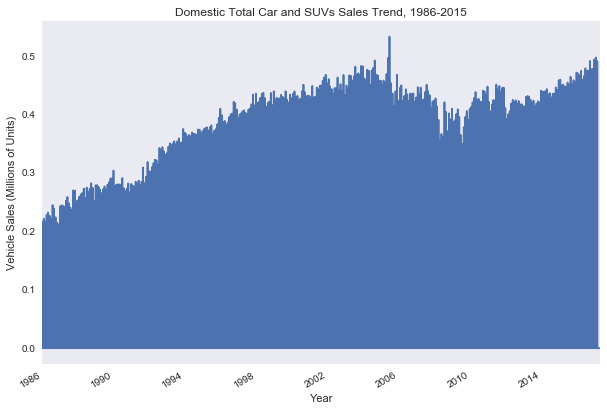

In [99]:
seab.set_style('dark')
fig, ax = plt.subplots(figsize=(10,7))

inds1 = inds['Light Weight Truck Sales Percentage']
inds1.plot(ax=ax,stacked=True)

ax.set_xlabel('Year')
ax.set_ylabel('Vehicle Sales (Millions of Units)')
ax.set_title('Domestic Total Car and SUVs Sales Trend, 1986-2015')

* Crude Oil Price Trend

In [2]:
seab.set_style('dark')
fig, ax = plt.subplots(figsize=(10,7))

inds2 = inds['Oil Price']
inds2.plot(ax=ax,stacked=True)

ax.set_xlabel('Year')
ax.set_ylabel('Crude Oil Prices')
ax.set_title('Crude Oil Price Trend, 1986-2017')

NameError: name 'seab' is not defined

* Real Disposable Personal Income Trend

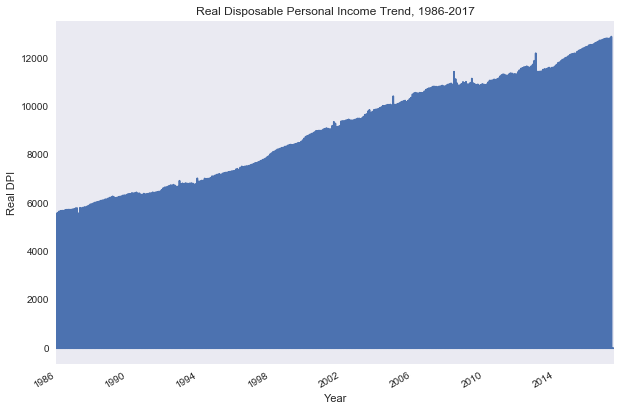

In [102]:
seab.set_style('dark')
fig, ax = plt.subplots(figsize=(10,7))

inds3 = inds['Real DPI']
inds3.plot(ax = ax, stacked = True)

ax.set_xlabel('Year')
ax.set_ylabel('Real DPI')
ax.set_title('Real Disposable Personal Income Trend, 1986-2017')

* Working Age Population Trend

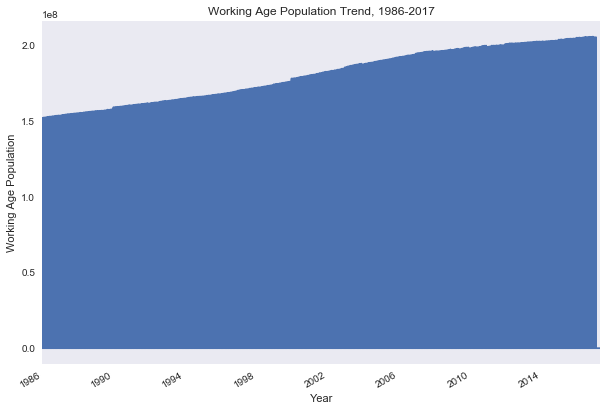

In [103]:
seab.set_style('dark')
fig, ax = plt.subplots(figsize=(10,7))

inds3 = inds['Working Age Population']
inds3.plot(ax = ax, stacked = True)

ax.set_xlabel('Year')
ax.set_ylabel('Working Age Population')
ax.set_title('Working Age Population Trend, 1986-2017')

* CPI for New and Used Vehicles Trend

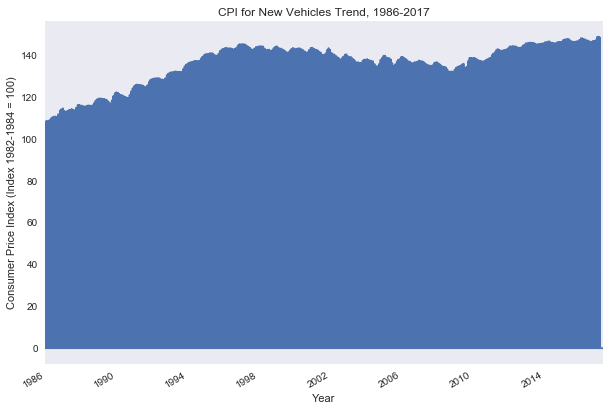

In [105]:
seab.set_style('dark')
fig, ax = plt.subplots(figsize=(10,7))

inds4 = inds['CPI: New']
inds4.plot(ax = ax, stacked = True)

ax.set_xlabel('Year')
ax.set_ylabel('Consumer Price Index (Index 1982-1984 = 100)')
ax.set_title('CPI for New Vehicles Trend, 1986-2017')

* Factors Correlated to SUVs Demand

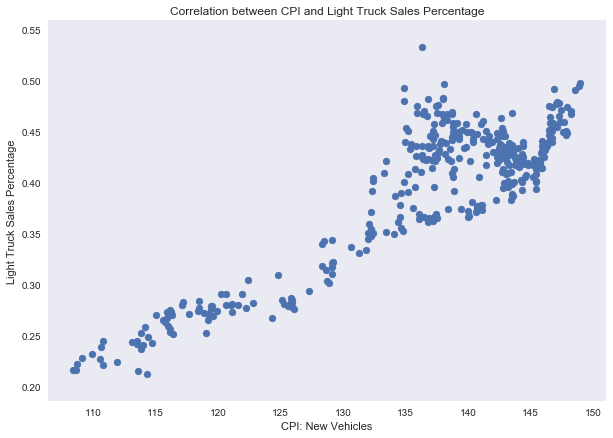

In [108]:
seab.set_style('dark')
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(inds['CPI: New'], inds['Light Weight Truck Sales Percentage'])
ax.set_title('Correlation between CPI and Light Truck Sales Percentage')
ax.set_ylabel('Light Truck Sales Percentage')
ax.set_xlabel('CPI: New Vehicles')

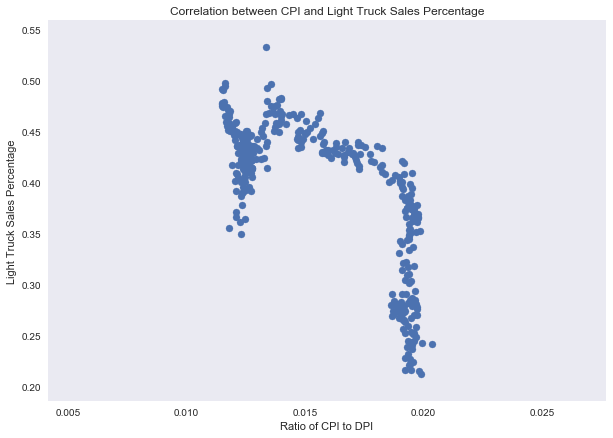

In [112]:
seab.set_style('dark')
fig, ax = plt.subplots(figsize=(10,7))
 
inds['Ratio of CPI to DPI'] = inds['CPI: New'] / inds['Real DPI']

ax.scatter(inds['Ratio of CPI to DPI'], inds['Light Weight Truck Sales Percentage'])
ax.set_title('Correlation between CPI and Light Truck Sales Percentage')
ax.set_ylabel('Light Truck Sales Percentage')
ax.set_xlabel('Ratio of CPI to DPI')

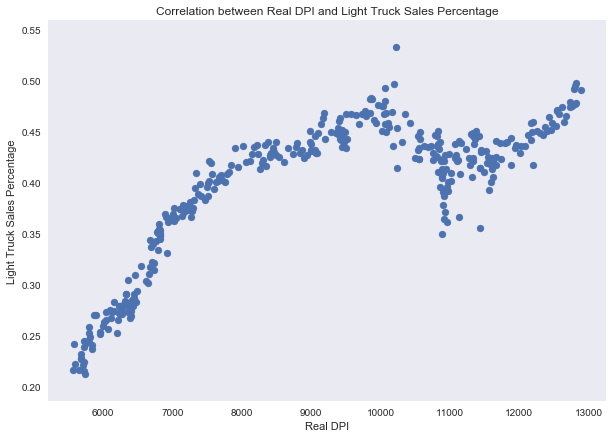

In [113]:
seab.set_style('dark')
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(inds['Real DPI'], inds['Light Weight Truck Sales Percentage'])
ax.set_title('Correlation between Real DPI and Light Truck Sales Percentage')
ax.set_ylabel('Light Truck Sales Percentage')
ax.set_xlabel('Real DPI')

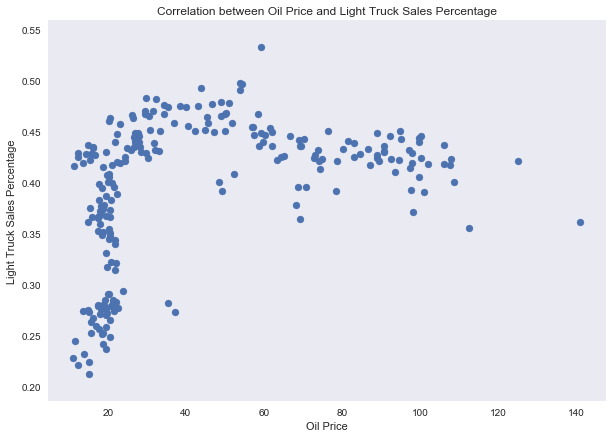

In [116]:
seab.set_style('dark')
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(inds['Oil Price'], inds['Light Weight Truck Sales Percentage'])
ax.set_title('Correlation between Oil Price and Light Truck Sales Percentage')
ax.set_ylabel('Light Truck Sales Percentage')
ax.set_xlabel('Oil Price')

In [5]:
indicators_updated = ['DCOILWTICO', 'TOTALSA', 'DLTRUCKSSAAR']
start_date = dt.datetime(2000, 1, 1)
inds_updated = web.DataReader(indicators_updated, "fred", start_date)
inds_updated['Light Weight Truck Sales Percentage'] = inds_updated['DLTRUCKSSAAR'] / inds_updated['TOTALSA']
end = inds_updated.index[-1]

inds_updated.columns = ['Oil Price', 'Total Vehicle Sales', 'Light Weight Truck Sales', 'Light Weight Truck Sales Percentage']

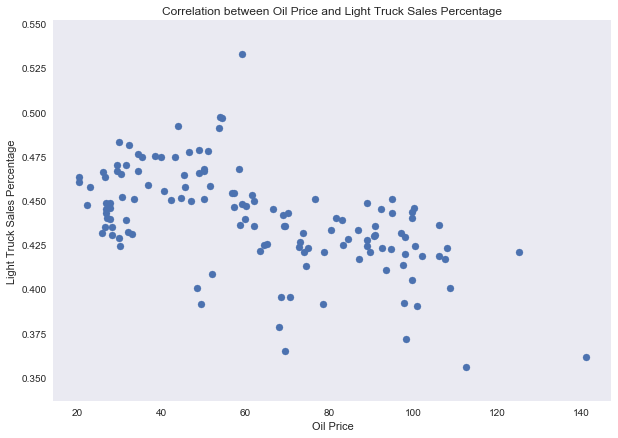

In [6]:
seab.set_style('dark')
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(inds_updated['Oil Price'], inds_updated['Light Weight Truck Sales Percentage'])
ax.set_title('Correlation between Oil Price and Light Truck Sales Percentage')
ax.set_ylabel('Light Truck Sales Percentage')
ax.set_xlabel('Oil Price')

### 4. Conclusion

In our analysis, we assumed that the demand of SUVs would be high during times of low oil prices and increase in real disposable income. 

We broke down our analysis into three steps as below: 

###### 1. Identify whether consumers are willing to purchase SUVs, despite the high oil prices. SUVs are generally perceived as more expensive than sedans due to their size and engine power. 

As we can see in the graph “Correlation between CPI and Light Truck Sales Percentage,” there is a linear relationship: the increase of sales of SUVs was dependent on CPI increase of SUVs. However, when the rate of CPI increase exceeds the DPI growth rate, the demand started falling as in the second graph of the “Correlation between CPI and light Truck Sales Percentage.”

###### 2. Once we confirm that consumers are still willing to purchase SUVs regardless of the price increase, we conducted a regression analysis to see whether there is truly a correlation between Disposable Personal Income and Sales of the SUVs trend. 

We confirmed the high correlation between the increase in real DPI and SUVs Sales. As Real DPI increases, the SUVs sales from the total number of cars sold in the US continued to increase as well. Please refer to the “Correlation between Real DPI and Light Truck Sales Percentage Graph.”

###### 3. The other key factor that really impacts sales of SUVs is the oil price. To confirm, we analyzed correlation between the oil price trend and sales of the SUVs. 

The 1st graph, “Correlation between Oil Price and Light Truck Sales Percentage,” did not confirm our assumption. The light truck sales percentage was independent of the oil price. A large portion of data was distributed between the oil price range of 10-20. We concluded that we used the wrong samples, because our oil and SUV sales data samples were from 1986 to 2016. From 1986 to 2002, the oil price was very stable in the 20-30 range and this was the time when SUV sales started to increase. To eliminate this sampling error, we conducted our regression analysis in the 2nd graph with data from 2002 to 2016. In the 2nd “Correlation between CPI and Light Truck Sales Percentage” graph, we were able to confirm the high correlation between oil price and SUVs. 

All in all, we concluded that the demand of SUVS had a strong correlation to oil price and disposable personal income. We believe the historical data are useful in analyzing the consumer's appetite for SUVs and estimating the demand of SUV production in relation to the key influencing factors. Nevertheless, the automotive industry is on the verge of going through significant transformation as electric cars and self-driving is a coming reality. Although our analysis is useful in identifying key factors for SUV demand up until today, the future SUVs demand cannot be concluded since the automotive industry trend will dramatically change. The data subject to analysis should be carefully selected to produce meaningful future SUVs demand in upcoming automotive industry transformation.
